<a href="https://colab.research.google.com/github/ShoryaDubey/ML/blob/main/SVR_Remaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amisha0528/social-network-ads")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/social-network-ads


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [8]:
print(df.columns)

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [9]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [10]:
print(X[:10])
print(Y[:10])

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
[0 0 0 0 0 0 0 1 0 0]


In [11]:
sc_age = StandardScaler()
X[:, 0:1] = sc_age.fit_transform(X[:, 0:1])
np.set_printoptions(precision=3)
print(X[:10])

[[    -1  19000]
 [     0  20000]
 [    -1  43000]
 [    -1  57000]
 [    -1  76000]
 [    -1  58000]
 [    -1  84000]
 [     0 150000]
 [    -1  33000]
 [     0  65000]]


In [12]:
sc_salary = StandardScaler()
X[:, 1:] = sc_salary.fit_transform(X[:, 1:])
np.set_printoptions(precision=3)
print(X[:10])

[[-1 -1]
 [ 0 -1]
 [-1  0]
 [-1  0]
 [-1  0]
 [-1  0]
 [-1  0]
 [ 0  2]
 [-1 -1]
 [ 0  0]]


In [13]:
sv = SVR(kernel='rbf')
sv.fit(X, Y)

SVR()

In [14]:
# Transform age and salary separately
age_scaled = sc_age.transform([[19]])
salary_scaled = sc_salary.transform([[85000]])

# Combine into one row
X_test = np.array([[age_scaled[0,0], salary_scaled[0,0]]])

# Predict
y_pred = sv.predict(X_test)


In [16]:
print(y_pred)

[0.528]


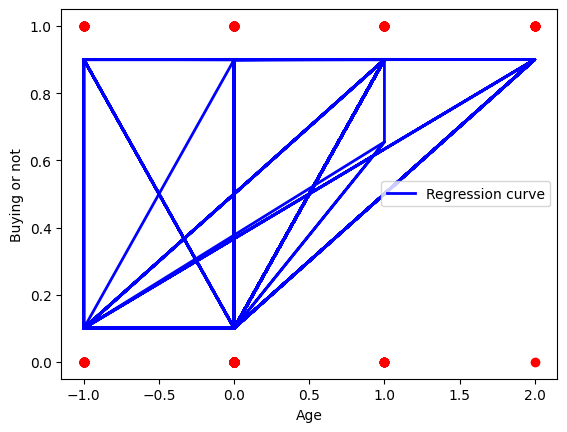

In [18]:
plt.scatter(X[:, 1:], Y, color='red')
plt.plot(X[:, 1:], sv.predict(X), color='blue', linewidth=2, label='Regression curve')

plt.xlabel('Age')
plt.ylabel('Buying or not')
plt.legend()
plt.show()